## In this noteboook, we draw wordcloud to see what are the frequent words under each sentiment on the "sell" discussions data that is subsetted from the overall house discussion data.

In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("sell.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,sorry allowed here pinged mod never heard back...,0,1,"[FOR SALE] 12"" Vinyl DJ House music collection..."
1,1,hello dad co owner house mom divorced re marri...,0,0,New home puchase
2,2,hey everyone girlfriend one first people canad...,0,1,SELLING: 2 Guaranteed Tomorrowland 2015 Ticket...
3,3,im currently process putting house market im m...,0,1,I’m sad about selling my house. Advice?
4,4,nthm tech house set june different type sh t s...,0,1,INSIDE: Hour-long Set with All Different Types...
5,5,watchu got reddit,0,1,"Looking for a delicious, funky house/dance mix..."
6,6,went watch pete tog playing heritage orchestra...,1,1,Pete Tong with the orchestra
7,7,hi im trying find solution problem wondering s...,0,1,Family dispute over flat
8,8,looking get track wordless people called minor...,2,1,Anyone know where I can get this track?
9,9,hey excited share recent mix mixed live yester...,0,1,[Mix Monday] will/wont- Uplink 002 (Tech/deep ...


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

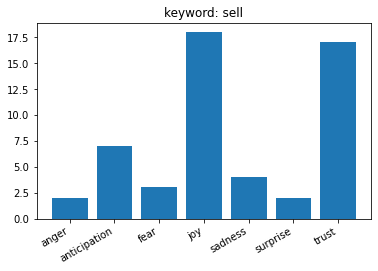

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: sell')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [sorry, allowed, here, pinged, mod, never, hea...
1     [hello, dad, co, owner, house, mom, divorced, ...
2     [hey, everyone, girlfriend, one, first, people...
3     [im, currently, process, putting, house, marke...
4     [nthm, tech, house, set, june, different, type...
5                                 [watchu, got, reddit]
6     [went, watch, pete, tog, playing, heritage, or...
7     [hi, im, trying, find, solution, problem, wond...
8     [looking, get, track, wordless, people, called...
9     [hey, excited, share, recent, mix, mixed, live...
10    [real, fan, old, school, soulful, sound, track...
11    [tell, style, jackin, people, speak, of, looki...
12    [heard, song, sample, buying, reocrds, selling...
13    [song, starting, around, video, amp, xb, tried...
14    [bought, album, sound, fast, eddie, vinyl, rec...
15    [wan, na, see, favorite, would, even, like, se...
16    [tracklist, link, mix, klangkarrusell, sonnent...
17    [selling, old, house, challenging, task, m

In [14]:
import itertools

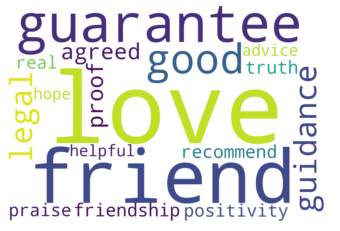

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 6),
 ('friend', 3),
 ('guarantee', 2),
 ('good', 2),
 ('guidance', 1),
 ('legal', 1),
 ('agreed', 1),
 ('proof', 1),
 ('friendship', 1),
 ('truth', 1)]

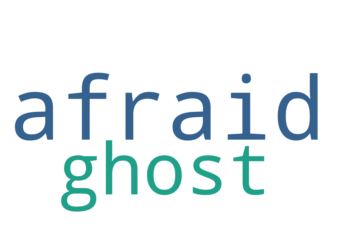

In [17]:
fear=emo(tokens,'fear')
wordcloud(fear)

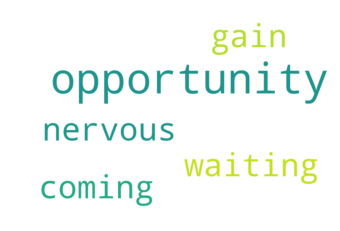

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('opportunity', 2),
 ('nervous', 1),
 ('waiting', 1),
 ('gain', 1),
 ('coming', 1)]

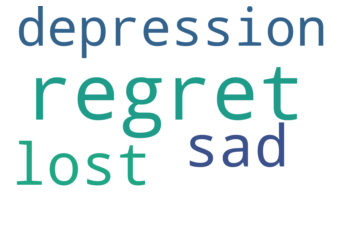

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

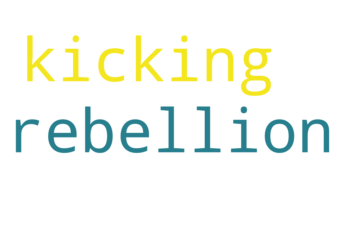

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

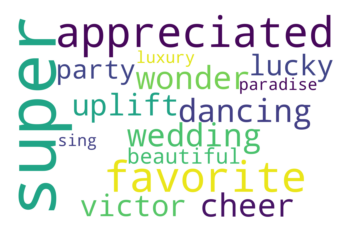

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)